<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> 
Credit Risk Analysis using Deep Learning
</h1>

<h5 style='margin:15px 15px; color:#006a79; '> 
Exploratory Data Analysis
</h5>
</div>


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>
Load the Libraries
</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_theme(style="darkgrid")

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>
1.Analyzing and Visualizing data
</h2>
</div>

<div class="alert alert-info" style="background-color:#63A6A2; color:white; padding:0px 10px; border-radius:5px;">
<h5 style='margin:10px 5px'>
1.1. Load the datasets
</h5>
</div>

In [2]:
# Get training data from .txt file
leaderboard_submission_example = pd.read_csv('../data/PAKDD2010_Leaderboard_Submission_Example.txt', header=None, delim_whitespace=True)
leaderboard_data = pd.read_csv('../data/PAKDD2010_Leaderboard_Data.txt', encoding= "ISO-8859-1", header= None, delimiter='\t')
modeling_data = pd.read_csv('../data/PAKDD2010_Modeling_Data.txt',header=None,delimiter='\t',encoding='ISO-8859-1')
prediction_data = pd.read_csv('../data/PAKDD2010_Prediction_Data.txt', encoding= "ISO-8859-1", header= None, delimiter='\t')
variable_list = pd.read_excel('../data/PAKDD2010_VariablesList.XLS', index_col=0)

/tmp/ipykernel_10250/1024690879.py:4: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  modeling_data = pd.read_csv('../data/PAKDD2010_Modeling_Data.txt',header=None,delimiter='\t',encoding='ISO-8859-1')


<div class="alert alert-info" style="background-color:#63A6A2; color:white; padding:0px 10px; border-radius:5px;">
<h5 style='margin:10px 5px'>
1.2. Print how many samples do have in datasets.
</h5>
</div>

In [3]:
print('Modeling Data : ', modeling_data.shape)
print('Leaderboard Submission Example : ', leaderboard_submission_example.shape)
print('Leaderboard Data Example : ', leaderboard_data.shape)
print('Prediction Data : ', prediction_data.shape)

Modeling Data :  (50000, 54)
Leaderboard Submission Example :  (20000, 2)
Leaderboard Data Example :  (20000, 53)
Prediction Data :  (20000, 53)


<div class="alert alert-info" style="background-color:#63A6A2; color:white; padding:0px 10px; border-radius:5px;">
<h5 style='margin:10px 5px'>
1.3. List all columns in the dataset.
</h5>
</div>

In [4]:
modeling_data.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


In [5]:
variable_list.head()

,Var_Title,Var_Description,Field_Content,Var_Description_Translated
Var_Id,,,,
1,ID_CLIENT,Sequential number for the applicant (to be use...,"1-50000, 50001-70000, 70001-90000",Número secuencial del solicitante (a utilizar ...
2,CLERK_TYPE,Not informed,C,No informado
3,PAYMENT_DAY,"Day of the month for bill payment, chosen by t...","1,5,10,15,20,25","Día del mes para el pago de la factura, elegid..."
4,APPLICATION_SUBMISSION_TYPE,Indicates if the application was submitted via...,"Web, Carga",Indica si la solicitud se envió a través de In...
5,QUANT_ADDITIONAL_CARDS,Quantity of additional cards asked for in the ...,"1,2,NULL",Cantidad de tarjetas adicionales solicitadas e...


In [6]:
leaderboard_submission_example.head()

,0,1
0,50001,0.772878
1,50002,0.177754
2,50003,0.930523
3,50004,0.875054
4,50005,0.117273


In [7]:
prediction_data.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,70001,C,10,Web,NaN,1,F,1,0,5,...,NaN,0,0,0,0,2,N,29,318,318
1,70002,C,10,Web,NaN,1,F,1,0,3,...,2.0,0,0,0,0,2,N,41,173,173
2,70003,C,25,Web,NaN,1,F,2,0,4,...,NaN,0,0,0,0,1,N,38,716,716
3,70004,C,5,Web,NaN,1,F,1,0,3,...,NaN,0,0,0,0,1,N,45,869,869
4,70005,C,20,Web,NaN,1,F,1,0,4,...,NaN,0,0,0,0,1,N,49,289,289


<div class="alert alert-info" style="background-color:#63A6A2; color:white; padding:0px 10px; border-radius:5px;">
<h5 style='margin:10px 5px'>
1.4. Show the distribution of the target variable values.
</h5>
</div>

Text(0.5, 12.44444444444443, 'Credit Compliance')

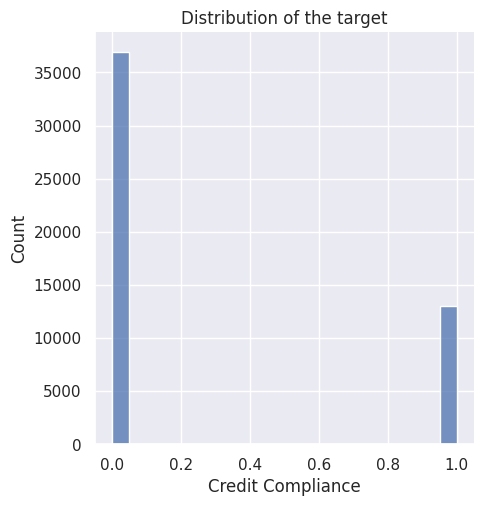

In [8]:
### Porpuse: show distribution of target variable
sns.displot(modeling_data[53], bins=20)
plt.title("Distribution of the target")
plt.xlabel("Credit Compliance")

Text(0.5, 0, 'Percens')

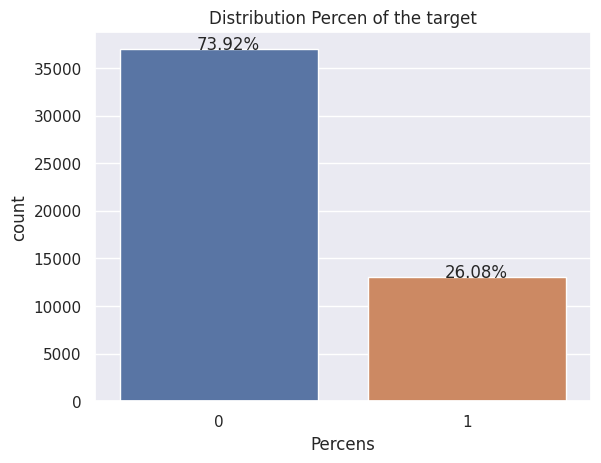

In [9]:
target = modeling_data[53]
perc = target.value_counts() / target.shape[0]
ax = sns.countplot(x=target)
for p, label in zip(ax.patches, perc):
    ax.annotate('{:.2f}%'.format(label*100), (p.get_x()+0.31, p.get_height()))
plt.title("Distribution Percen of the target")
plt.xlabel("Percens")

<div class="alert alert-info" style="background-color:#63A6A2; color:white; padding:0px 10px; border-radius:5px;">
<h5 style='margin:10px 5px'>
1.5. Identify duplicate columns
</h5>
</div>

In [10]:
bool_series = variable_list.duplicated(subset='Var_Title')
print('DataFrame after removing duplicates found in the Name column:')
array = variable_list[bool_series==True].Var_Title
array

DataFrame after removing duplicates found in the Name column:


Var_Id
44    EDUCATION_LEVEL
Name: Var_Title, dtype: object

#### We list the duplicate columns

In [11]:
variable_list[variable_list.Var_Title == "EDUCATION_LEVEL"]

,Var_Title,Var_Description,Field_Content,Var_Description_Translated
Var_Id,,,,
10,EDUCATION_LEVEL,Edducational level in gradual order not informed,"1,2,3,4,5",Nivel educativo en orden gradual no informado
44,EDUCATION_LEVEL,Mate's educational level in gradual order not ...,"1,2,3,4,5",Nivel educativo del compañero en orden gradual...


There are two EDUCATION_LEVEL variables, one is related to the educational level of the applicant and the second is related to the level of the applicant's partner.
The most convenient is to differentiate both variables with a different name.

<div class="alert alert-info" style="background-color:#63A6A2; color:white; padding:0px 10px; border-radius:5px;">
<h5 style='margin:10px 5px'>
1.6. Rename the columns duplicated and Assign the column names to the dataset
</h5>
</div>

In [12]:
variable_list.loc[10].Var_Title = 'CLIENT_'+variable_list.loc[10].Var_Title
variable_list.loc[44].Var_Title = 'MATE_'+variable_list.loc[44].Var_Title

Set teh columns name of the Modeling_Data dataset

In [13]:
columns = []
for column in variable_list['Var_Title']:     
    columns.append(column)
#Names are assigned to the columns
modeling_data.columns = columns
#The index is assigned to the dataset
modeling_data = modeling_data.set_index('ID_CLIENT')

<div class="alert alert-info" style="background-color:#63A6A2; color:white; padding:0px 10px; border-radius:5px;">
<h5 style='margin:10px 5px'>
1.7. Descriptive Statistics
</h5>
</div>

- Mean, median, mode 
- Min, max
- Count etc

In [14]:
modeling_data.describe()

,PAYMENT_DAY,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,CLIENT_EDUCATION_LEVEL,NACIONALITY,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,...,OCCUPATION_TYPE,MATE_PROFESSION_CODE,MATE_EDUCATION_LEVEL,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,AGE,TARGET_LABEL_BAD=1
count,50000.000000,50000.0,50000.000000,50000.00000,50000.000000,50000.0,50000.000000,48651.000000,46223.000000,50000.000000,...,42687.000000,21116.000000,17662.000000,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.00000,50000.000000
mean,12.869920,0.0,1.006540,2.14840,0.650520,0.0,0.961600,1.252225,9.727149,0.802280,...,2.484316,3.797926,0.296003,0.0,0.0,0.0,0.0,1.275700,43.24852,0.260820
std,6.608385,0.0,0.080606,1.32285,1.193655,0.0,0.202105,0.867833,10.668841,0.398284,...,1.532261,5.212168,0.955688,0.0,0.0,0.0,0.0,0.988286,14.98905,0.439086
min,1.000000,0.0,1.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,6.00000,0.000000
25%,10.000000,0.0,1.000000,1.00000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,31.00000,0.000000
50%,10.000000,0.0,1.000000,2.00000,0.000000,0.0,1.000000,1.000000,6.000000,1.000000,...,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,41.00000,0.000000
75%,15.000000,0.0,1.000000,2.00000,1.000000,0.0,1.000000,1.000000,15.000000,1.000000,...,4.000000,11.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,53.00000,1.000000
max,25.000000,0.0,2.000000,7.00000,53.000000,0.0,2.000000,5.000000,228.000000,1.000000,...,5.000000,17.000000,5.000000,0.0,0.0,0.0,0.0,7.000000,106.00000,1.000000


<div class="alert alert-info" style="background-color:#63A6A2; color:white; padding:0px 10px; border-radius:5px;">
<h5 style='margin:10px 5px'>
1.8. Show the number of columns of each data type.
</h5>
</div>

In [15]:
print('        Type of Data')
print('--------------------------')
print(modeling_data.dtypes.value_counts())
#modeling_data.dtypes == np.int64
print('        Numeric type Columns')
print('---------------------------------')
modeling_data.select_dtypes([np.int64]).info()
print('        Float type Columns')
print('---------------------------------')
modeling_data.select_dtypes([np.object]).info()
print('        Object type Columns')
print('---------------------------------')
modeling_data.select_dtypes([np.object]).info()

        Type of Data
--------------------------
int64      24
object     20
float64     9
dtype: int64
        Numeric type Columns
---------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1 to 50000
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   PAYMENT_DAY                     50000 non-null  int64
 1   QUANT_ADDITIONAL_CARDS          50000 non-null  int64
 2   POSTAL_ADDRESS_TYPE             50000 non-null  int64
 3   MARITAL_STATUS                  50000 non-null  int64
 4   QUANT_DEPENDANTS                50000 non-null  int64
 5   CLIENT_EDUCATION_LEVEL          50000 non-null  int64
 6   NACIONALITY                     50000 non-null  int64
 7   FLAG_EMAIL                      50000 non-null  int64
 8   FLAG_VISA                       50000 non-null  int64
 9   FLAG_MASTERCARD                 50000 non-null  int64
 10  FLAG_DINERS 

/tmp/ipykernel_10250/3645373232.py:10: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modeling_data.select_dtypes([np.object]).info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1 to 50000
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   CLERK_TYPE                    50000 non-null  object
 1   APPLICATION_SUBMISSION_TYPE   50000 non-null  object
 2   SEX                           50000 non-null  object
 3   STATE_OF_BIRTH                50000 non-null  object
 4   CITY_OF_BIRTH                 50000 non-null  object
 5   RESIDENCIAL_STATE             50000 non-null  object
 6   RESIDENCIAL_CITY              50000 non-null  object
 7   RESIDENCIAL_BOROUGH           50000 non-null  object
 8   FLAG_RESIDENCIAL_PHONE        50000 non-null  object
 9   RESIDENCIAL_PHONE_AREA_CODE   50000 non-null  object
 10  FLAG_MOBILE_PHONE             50000 non-null  object
 11  COMPANY                       50000 non-null  object
 12  PROFESSIONAL_STATE            50000 non-null  object
 13  PROFESSIONAL_CIT

/tmp/ipykernel_10250/3645373232.py:13: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modeling_data.select_dtypes([np.object]).info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1 to 50000
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   CLERK_TYPE                    50000 non-null  object
 1   APPLICATION_SUBMISSION_TYPE   50000 non-null  object
 2   SEX                           50000 non-null  object
 3   STATE_OF_BIRTH                50000 non-null  object
 4   CITY_OF_BIRTH                 50000 non-null  object
 5   RESIDENCIAL_STATE             50000 non-null  object
 6   RESIDENCIAL_CITY              50000 non-null  object
 7   RESIDENCIAL_BOROUGH           50000 non-null  object
 8   FLAG_RESIDENCIAL_PHONE        50000 non-null  object
 9   RESIDENCIAL_PHONE_AREA_CODE   50000 non-null  object
 10  FLAG_MOBILE_PHONE             50000 non-null  object
 11  COMPANY                       50000 non-null  object
 12  PROFESSIONAL_STATE            50000 non-null  object
 13  PROFESSIONAL_CIT

<div class="alert alert-info" style="background-color:#63A6A2; color:white; padding:0px 10px; border-radius:5px;">
<h5 style='margin:10px 5px'>
1.9. Missing Values
</h5>
</div>

In [16]:
# Missing values for every column
print("Missing values for every column")
print("-----------------------------------")
modeling_data.isna().sum()

Missing values for every column
-----------------------------------


CLERK_TYPE                            0
PAYMENT_DAY                           0
APPLICATION_SUBMISSION_TYPE           0
QUANT_ADDITIONAL_CARDS                0
POSTAL_ADDRESS_TYPE                   0
SEX                                   0
MARITAL_STATUS                        0
QUANT_DEPENDANTS                      0
CLIENT_EDUCATION_LEVEL                0
STATE_OF_BIRTH                        0
CITY_OF_BIRTH                         0
NACIONALITY                           0
RESIDENCIAL_STATE                     0
RESIDENCIAL_CITY                      0
RESIDENCIAL_BOROUGH                   0
FLAG_RESIDENCIAL_PHONE                0
RESIDENCIAL_PHONE_AREA_CODE           0
RESIDENCE_TYPE                     1349
MONTHS_IN_RESIDENCE                3777
FLAG_MOBILE_PHONE                     0
FLAG_EMAIL                            0
PERSONAL_MONTHLY_INCOME               0
OTHER_INCOMES                         0
FLAG_VISA                             0
FLAG_MASTERCARD                       0


Records with missing data

In [17]:
data = modeling_data
count_10 = 0
count_15 = 0
count_15_more = 0
count_20_more = 0
for i in range(len(data.index)) :
    percent_missing_row =  ((data.iloc[i].isnull().sum())*100)/modeling_data.shape[1]    
    if percent_missing_row < 10: count_10+=1
    elif 10 <= percent_missing_row < 15: count_15+=1
    elif 15 <= percent_missing_row < 20: count_15_more+=1
    elif 20 <= percent_missing_row : count_20_more+=1

print("Record with a percentage of missing data of up to 10% : ",count_10)
print("Record with a percentage of missing data between 10% and 15% : ",count_15)
print("Record with a percentage of missing data between 15% and 20% : ",count_15_more)
print("Record with a percentage of missing data with ma of 20%: ",count_20_more)
    
        

Record with a percentage of missing data of up to 10% :  44129
Record with a percentage of missing data between 10% and 15% :  5300
Record with a percentage of missing data between 15% and 20% :  571
Record with a percentage of missing data with ma of 20%:  0


Records with up to 20% missing data are 1% of our total dataset. In general, the records are complete, we can proceed to the imputation.

In [18]:
col_dypes = modeling_data.dtypes
col_dypes.name= "Data type"
col_n_unique_values= data.nunique()
col_n_unique_values.name= "# Unique Values"

col_per_unique_values= np.round(data.nunique() / data.shape[0] * 100, 2)
col_per_unique_values.name= "% Unique Values"

col_n_null_values= data.isna().sum()
col_n_null_values.name= "# NULL Values"
col_per_null_values= np.round(data.isna().sum() / data.shape[0] * 100, 2)
col_per_null_values.name= "% NULL Values"

columns_metrics= pd.concat(
    objs=[
        col_dypes, 
        col_n_unique_values, 
        col_per_unique_values,
        col_n_null_values, 
        col_per_null_values
    ], 
    axis= 1
)

In [19]:
columns_metrics

,Data type,# Unique Values,% Unique Values,# NULL Values,% NULL Values
CLERK_TYPE,object,1,0.00,0,0.00
PAYMENT_DAY,int64,6,0.01,0,0.00
APPLICATION_SUBMISSION_TYPE,object,3,0.01,0,0.00
QUANT_ADDITIONAL_CARDS,int64,1,0.00,0,0.00
POSTAL_ADDRESS_TYPE,int64,2,0.00,0,0.00
SEX,object,4,0.01,0,0.00
MARITAL_STATUS,int64,8,0.02,0,0.00
QUANT_DEPENDANTS,int64,17,0.03,0,0.00
CLIENT_EDUCATION_LEVEL,int64,1,0.00,0,0.00
STATE_OF_BIRTH,object,29,0.06,0,0.00


In [20]:
# Remove columns with duplicate values
data = data.transpose().drop_duplicates().transpose()
data

,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,CITY_OF_BIRTH,...,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,MATE_EDUCATION_LEVEL,PRODUCT,AGE,RESIDENCIAL_ZIP_3,TARGET_LABEL_BAD=1
ID_CLIENT,,,,,,,,,,,,,,,,,,,,,
1,C,5,Web,0,1,F,6,1,RN,Assu,...,,0,9.0,4.0,NaN,NaN,1,32,595,1
2,C,15,Carga,0,1,F,2,0,RJ,rio de janeiro,...,,0,11.0,4.0,11.0,NaN,1,34,230,1
3,C,5,Web,0,1,F,2,0,RN,GARANHUNS,...,,0,11.0,NaN,NaN,NaN,1,27,591,0
4,C,20,Web,0,1,F,2,0,PE,CABO,...,,0,NaN,NaN,NaN,NaN,1,61,545,0
5,C,10,Web,0,1,M,2,0,RJ,RIO DE JANEIRO,...,,0,9.0,5.0,NaN,NaN,1,48,235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,C,10,0,0,1,F,1,2,RN,NATAL,...,,0,9.0,4.0,0.0,0.0,1,36,591,1
49997,C,25,0,0,1,F,1,0,SP,LENCOIS PAULISTA,...,,0,NaN,NaN,NaN,NaN,2,21,186,0
49998,C,5,Web,0,1,M,2,3,PR,RIO BONITO,...,5,0,9.0,2.0,NaN,NaN,1,41,715,0


In [21]:
### Porpuse: checking missing data

#calcute the percent
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_modeling_data = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
#sorted in descending order
missing_value_modeling_data.sort_values('percent_missing', inplace=True, ascending=False)

drop_columns_50_percent_missing = missing_value_modeling_data[missing_value_modeling_data.percent_missing > 50]
drop_columns_50_percent_missing

,column_name,percent_missing
PROFESSIONAL_BOROUGH,PROFESSIONAL_BOROUGH,67.566
PROFESSIONAL_CITY,PROFESSIONAL_CITY,67.566
MATE_EDUCATION_LEVEL,MATE_EDUCATION_LEVEL,64.676
MATE_PROFESSION_CODE,MATE_PROFESSION_CODE,57.768


In [22]:
### Porpuse: show number of unique values per categorical column
modeling_data_object = data.select_dtypes(exclude='number')
unique_value_modeling_data = pd.DataFrame(modeling_data_object.nunique())
unique_value_modeling_data = pd.DataFrame({'column_name': unique_value_modeling_data.index,
                                 'unique_value': unique_value_modeling_data[0]})
#sorted in descending order
unique_value_modeling_data.sort_values('unique_value', inplace=True, ascending=False)
drop_columns_unique_value_1000 = unique_value_modeling_data[unique_value_modeling_data.unique_value > 1000]
print('Column that have more 1000 unique values : ',drop_columns_unique_value_1000)

Column that have more 1000 unique values :                                       column_name  unique_value
RESIDENCIAL_BOROUGH          RESIDENCIAL_BOROUGH         14511
CITY_OF_BIRTH                      CITY_OF_BIRTH          9910
PERSONAL_MONTHLY_INCOME  PERSONAL_MONTHLY_INCOME          5495
PROFESSIONAL_BOROUGH        PROFESSIONAL_BOROUGH          5057
RESIDENCIAL_CITY                RESIDENCIAL_CITY          3529
PROFESSIONAL_CITY              PROFESSIONAL_CITY          2236
RESIDENCIAL_ZIP_3              RESIDENCIAL_ZIP_3          1481


In [23]:
### Porpuse: show number of unique values per categorical column
modeling_data_object = data.select_dtypes(include=['int64','object','float64'])
unique_value_modeling_data = pd.DataFrame(modeling_data_object.nunique())
unique_value_modeling_data = pd.DataFrame({'column_name': unique_value_modeling_data.index,
                                 'unique_value': unique_value_modeling_data[0]})
#sorted in descending order
unique_value_modeling_data.sort_values('unique_value', inplace=True, ascending=False)
drop_columns_unique_value_1 = unique_value_modeling_data[unique_value_modeling_data.unique_value == 1]
print('\nColumn that have one unique value : ',drop_columns_unique_value_1)


Column that have one unique value :                                     column_name  unique_value
FLAG_MOBILE_PHONE            FLAG_MOBILE_PHONE             1
QUANT_ADDITIONAL_CARDS  QUANT_ADDITIONAL_CARDS             1
CLERK_TYPE                          CLERK_TYPE             1


In [24]:
drop_columns = pd.concat([drop_columns_50_percent_missing.column_name,drop_columns_unique_value_1000.column_name,
drop_columns_unique_value_1.column_name],axis=1)
len(drop_columns.index)

12

In [25]:
drop_columns.index

Index(['PROFESSIONAL_BOROUGH', 'PROFESSIONAL_CITY', 'MATE_EDUCATION_LEVEL',
       'MATE_PROFESSION_CODE', 'RESIDENCIAL_BOROUGH', 'CITY_OF_BIRTH',
       'PERSONAL_MONTHLY_INCOME', 'RESIDENCIAL_CITY', 'RESIDENCIAL_ZIP_3',
       'FLAG_MOBILE_PHONE', 'QUANT_ADDITIONAL_CARDS', 'CLERK_TYPE'],
      dtype='object')

In [26]:
data

,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,CITY_OF_BIRTH,...,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,MATE_EDUCATION_LEVEL,PRODUCT,AGE,RESIDENCIAL_ZIP_3,TARGET_LABEL_BAD=1
ID_CLIENT,,,,,,,,,,,,,,,,,,,,,
1,C,5,Web,0,1,F,6,1,RN,Assu,...,,0,9.0,4.0,NaN,NaN,1,32,595,1
2,C,15,Carga,0,1,F,2,0,RJ,rio de janeiro,...,,0,11.0,4.0,11.0,NaN,1,34,230,1
3,C,5,Web,0,1,F,2,0,RN,GARANHUNS,...,,0,11.0,NaN,NaN,NaN,1,27,591,0
4,C,20,Web,0,1,F,2,0,PE,CABO,...,,0,NaN,NaN,NaN,NaN,1,61,545,0
5,C,10,Web,0,1,M,2,0,RJ,RIO DE JANEIRO,...,,0,9.0,5.0,NaN,NaN,1,48,235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,C,10,0,0,1,F,1,2,RN,NATAL,...,,0,9.0,4.0,0.0,0.0,1,36,591,1
49997,C,25,0,0,1,F,1,0,SP,LENCOIS PAULISTA,...,,0,NaN,NaN,NaN,NaN,2,21,186,0
49998,C,5,Web,0,1,M,2,3,PR,RIO BONITO,...,5,0,9.0,2.0,NaN,NaN,1,41,715,0


In [27]:
# Drop columns with non-relevant information
data = data.drop(columns=drop_columns.index)
data

,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,...,COMPANY,PROFESSIONAL_STATE,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,TARGET_LABEL_BAD=1
ID_CLIENT,,,,,,,,,,,,,,,,,,,,,
1,5,Web,1,F,6,1,RN,1,RN,Y,...,N,,N,,0,9.0,4.0,1,32,1
2,15,Carga,1,F,2,0,RJ,1,RJ,Y,...,Y,,N,,0,11.0,4.0,1,34,1
3,5,Web,1,F,2,0,RN,1,RN,Y,...,N,,N,,0,11.0,NaN,1,27,0
4,20,Web,1,F,2,0,PE,1,PE,N,...,N,,N,,0,NaN,NaN,1,61,0
5,10,Web,1,M,2,0,RJ,1,RJ,Y,...,N,,N,,0,9.0,5.0,1,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,10,0,1,F,1,2,RN,1,RN,Y,...,N,,N,,0,9.0,4.0,1,36,1
49997,25,0,1,F,1,0,SP,1,SP,Y,...,N,,N,,0,NaN,NaN,2,21,0
49998,5,Web,1,M,2,3,PR,1,SP,Y,...,Y,SP,Y,5,0,9.0,2.0,1,41,0


In [28]:
expected_values = {
    'PAYMENT_DAY': [1, 5, 10, 15, 20, 25],
    'APPLICATION_SUBMISSION_TYPE': ['Web', 'Carga'],
    'QUANT_ADDITIONAL_CARDS': [1, 2],
    'POSTAL_ADDRESS_TYPE': [1, 2],
    'SEX': ['M', 'F'],
    'MARITAL_STATUS': [1, 2, 3, 4, 5, 6, 7],
    'EDUCATION_LEVEL': [1, 2, 3, 4, 5],
    'NACIONALITY': [0, 1, 2],
    'FLAG_RESIDENTIAL_PHONE': ['Y', 'N'],
    'RESIDENCE_TYPE': [1, 2, 3, 4 ,5],
    'FLAG_MOBILE_PHONE': ['Y', 'N'],
    'FLAG_EMAIL': [0, 1],
    'FLAG_VISA': [0, 1],
    'FLAG_MASTERCARD': [0, 1],
    'FLAG_DINERS': [0, 1],
    'FLAG_AMERICAN_EXPRESS': [0, 1],
    'FLAG_OTHER_CARDS': [0, 1],
    'QUANT_BANKING_ACCOUNTS': [0, 1, 2],
    'QUANT_SPECIAL_BANKING_ACCOUNTS': [0, 1, 2],
    'COMPANY': ['Y', 'N'],
    'FLAG_PROFESSIONAL_PHONE': ['Y', 'N'],
    'OCCUPATION_TYPE': [1, 2, 3, 4, 5],
    'EDUCATION_LEVEL_2': [1, 2, 3, 4, 5],
    'FLAG_HOME_ADDRESS_DOCUMENT': [0, 1],
    'FLAG_RG': [0, 1],
    'FLAG_CPF': [0, 1],
    'FLAG_INCOME_PROOF': [0, 1],
    'FLAG_ACSP_RECORD': ['Y', 'N'],
    'TARGET_LABEL_BAD=1': [0, 1]
}

In [29]:
for col in data.columns:
    if col in expected_values:
        # Define a categorical data type
        cat_dtype = pd.CategoricalDtype(categories=expected_values[col],
                                        ordered=False)
        data[col] = data[col].astype(dtype=cat_dtype)

# Convert types to suggested by pandas
data = data.convert_dtypes()

In [30]:
# Get the numerical variables
num_vars = data._get_numeric_data().columns
# Get the categorical variables
cat_vars = list(set(data.columns) - set(num_vars))

In [31]:
num_vars

Index(['QUANT_DEPENDANTS', 'MONTHS_IN_RESIDENCE', 'OTHER_INCOMES',
       'PERSONAL_ASSETS_VALUE', 'QUANT_CARS', 'MONTHS_IN_THE_JOB',
       'PROFESSION_CODE', 'PRODUCT', 'AGE'],
      dtype='object')

In [32]:
cat_vars

['SEX',
 'RESIDENCIAL_PHONE_AREA_CODE',
 'FLAG_AMERICAN_EXPRESS',
 'RESIDENCIAL_STATE',
 'RESIDENCE_TYPE',
 'OCCUPATION_TYPE',
 'FLAG_DINERS',
 'PAYMENT_DAY',
 'PROFESSIONAL_PHONE_AREA_CODE',
 'TARGET_LABEL_BAD=1',
 'FLAG_PROFESSIONAL_PHONE',
 'POSTAL_ADDRESS_TYPE',
 'FLAG_OTHER_CARDS',
 'STATE_OF_BIRTH',
 'FLAG_VISA',
 'FLAG_RESIDENCIAL_PHONE',
 'NACIONALITY',
 'PROFESSIONAL_STATE',
 'FLAG_EMAIL',
 'FLAG_MASTERCARD',
 'APPLICATION_SUBMISSION_TYPE',
 'MARITAL_STATUS',
 'COMPANY',
 'QUANT_BANKING_ACCOUNTS']

#### Count empty strings present in each column

In [33]:
# Count empty strings present in each column
data.isin(values=[' ']).sum()

PAYMENT_DAY                         0
APPLICATION_SUBMISSION_TYPE         0
POSTAL_ADDRESS_TYPE                 0
SEX                                 0
MARITAL_STATUS                      0
QUANT_DEPENDANTS                    0
STATE_OF_BIRTH                   2064
NACIONALITY                         0
RESIDENCIAL_STATE                   0
FLAG_RESIDENCIAL_PHONE              0
RESIDENCIAL_PHONE_AREA_CODE      8212
RESIDENCE_TYPE                      0
MONTHS_IN_RESIDENCE                 0
FLAG_EMAIL                          0
OTHER_INCOMES                       0
FLAG_VISA                           0
FLAG_MASTERCARD                     0
FLAG_DINERS                         0
FLAG_AMERICAN_EXPRESS               0
FLAG_OTHER_CARDS                    0
QUANT_BANKING_ACCOUNTS              0
PERSONAL_ASSETS_VALUE               0
QUANT_CARS                          0
COMPANY                             0
PROFESSIONAL_STATE              34307
FLAG_PROFESSIONAL_PHONE             0
PROFESSIONAL

In [34]:
# Replace empty strings feature by feature
data.PROFESSIONAL_STATE.replace(to_replace=['', ' '],
                                      value='NO_JOB',
                                      inplace=True)

data.STATE_OF_BIRTH.replace(to_replace=['', ' '],
                                      value='NO_DATA',
                                      inplace=True)

data.RESIDENCIAL_PHONE_AREA_CODE.replace(to_replace=['', ' '],
                                      value='NO_DATA',
                                      inplace=True)

data.PROFESSIONAL_PHONE_AREA_CODE.replace(to_replace=['', ' '],
                                      value='NO_DATA',
                                      inplace=True)
# Convert types to suggested by pandas
data = data.convert_dtypes()

In [35]:
for col in cat_vars:
    data[col]= data[col].apply(lambda s: s.upper() if isinstance(s, str) else s)
    data[col]= data[col].apply(lambda s: np.nan if s == " " else s)

<div class="alert alert-info" style="background-color:#63A6A2; color:white; padding:0px 10px; border-radius:5px;">
<h5 style='margin:10px 5px'>
1.10. Check the distribution of every feature
</h5>
</div>

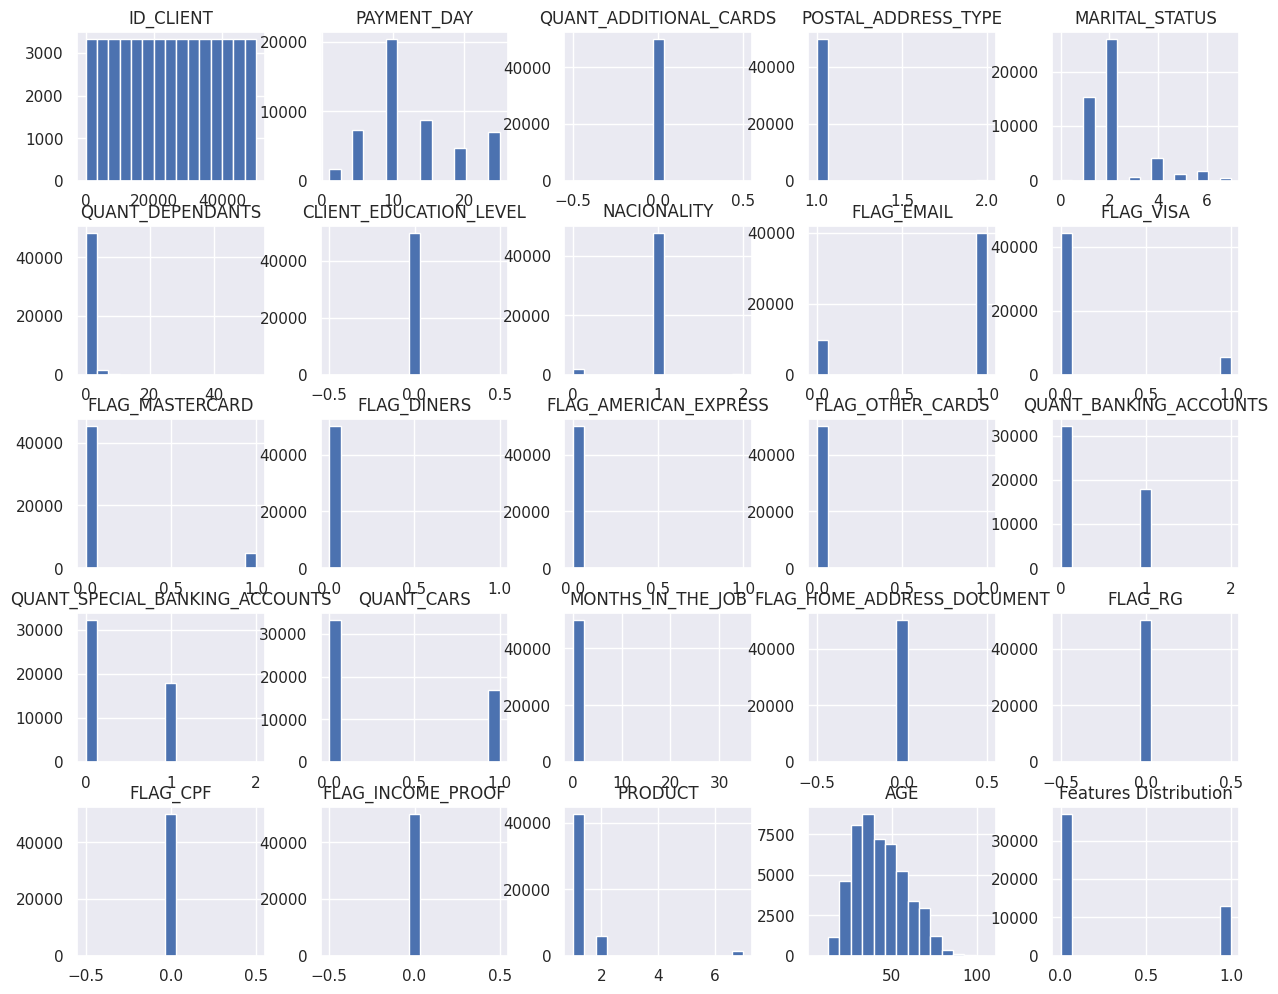

In [ ]:
# Check the distribution of all the features
data_int = modeling_data.select_dtypes([np.int64])
data_int.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

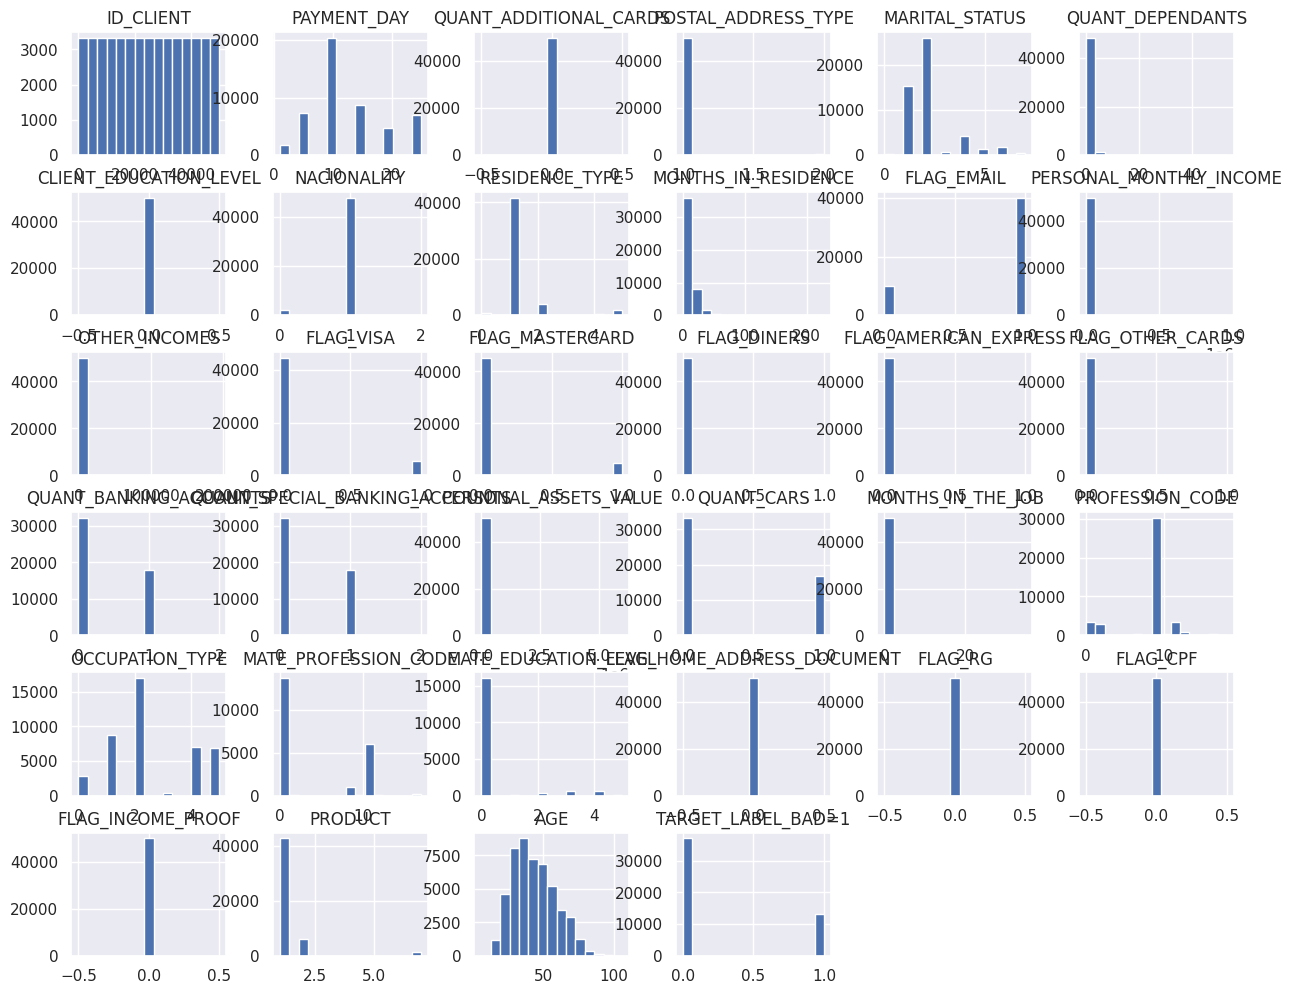

In [ ]:
# Check the distribution of all the features
modeling_data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

<div class="alert alert-info" style="background-color:#63A6A2; color:white; padding:0px 10px; border-radius:5px;">
<h5 style='margin:10px 5px'>
1.11. Analyzing the correlation between the characteristics and the objective variable
</h5>
</div>

In [38]:
data.corr()

/tmp/ipykernel_10250/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,QUANT_DEPENDANTS,MONTHS_IN_RESIDENCE,OTHER_INCOMES,PERSONAL_ASSETS_VALUE,QUANT_CARS,MONTHS_IN_THE_JOB,PROFESSION_CODE,PRODUCT,AGE
QUANT_DEPENDANTS,1.000000,-0.039378,0.002430,0.016049,0.025209,0.007597,0.020347,0.009623,-0.037415
MONTHS_IN_RESIDENCE,-0.039378,1.000000,0.016208,0.031802,-0.043472,0.014715,-0.027821,-0.020528,0.223815
OTHER_INCOMES,0.002430,0.016208,1.000000,0.003353,0.000717,0.003335,0.002557,-0.000704,0.012694
PERSONAL_ASSETS_VALUE,0.016049,0.031802,0.003353,1.000000,0.009493,0.017565,-0.002678,0.005774,0.009248
QUANT_CARS,0.025209,-0.043472,0.000717,0.009493,1.000000,-0.006033,-0.282150,0.028973,0.019451
MONTHS_IN_THE_JOB,0.007597,0.014715,0.003335,0.017565,-0.006033,1.000000,0.007806,-0.004458,0.009908
PROFESSION_CODE,0.020347,-0.027821,0.002557,-0.002678,-0.282150,0.007806,1.000000,-0.018883,-0.025078
PRODUCT,0.009623,-0.020528,-0.000704,0.005774,0.028973,-0.004458,-0.018883,1.000000,-0.001512
AGE,-0.037415,0.223815,0.012694,0.009248,0.019451,0.009908,-0.025078,-0.001512,1.000000


In [ ]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(modeling_data.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

<div class="alert alert-info" style="background-color:#63A6A2; color:white; padding:0px 10px; border-radius:5px;">
<h5 style='margin:10px 5px'>
1.10. We save the results in a csv
</h5>
</div>

In [37]:
# Save data to csv
data.to_csv(
    path_or_buf= "../data/raw_modeling_data.csv"
)

# Save num_vars and cat_vars lists into txt files
with open('../data/numerical_features.txt', 'w') as f:
    f.write('\n'.join(num_vars))

with open('../data/categorical_features.txt', 'w') as f:
    f.write('\n'.join(cat_vars))